<a href="https://colab.research.google.com/github/aiml-gowtham/MachineLearning/blob/Linear-Regression/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd

In [78]:
url = 'https://raw.githubusercontent.com/aiml-gowtham/MachineLearning/refs/heads/Linear-Regression/Food_Delivery_Times.csv'

In [79]:
df = pd.read_csv(url)

In [80]:
df.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [81]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [82]:
df.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [83]:
df['Vehicle_Type'].unique()

array(['Scooter', 'Bike', 'Car'], dtype=object)

In [84]:
df['Weather'].unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy', nan], dtype=object)

In [85]:
df['Time_of_Day'].unique()

array(['Afternoon', 'Evening', 'Night', 'Morning', nan], dtype=object)

In [86]:
df['Traffic_Level'].unique()

array(['Low', 'Medium', 'High', nan], dtype=object)

In [87]:
df1 = df.copy()

In [88]:
df1.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


# **Identifying the missing values**

In [89]:
df1 = df1.dropna()

In [90]:
df1.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,883.000000,883.000000,883.000000,883.000000,883.000000
mean,508.109853,10.051586,17.019253,4.639864,56.425821
std,287.925161,5.688582,7.260201,2.922172,21.568482
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,263.500000,5.130000,11.000000,2.000000,41.000000
50%,512.000000,10.280000,17.000000,5.000000,55.000000
75%,758.500000,15.025000,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,141.000000


In [91]:
df1.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


# **visualise, Identify and remove outliers**

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

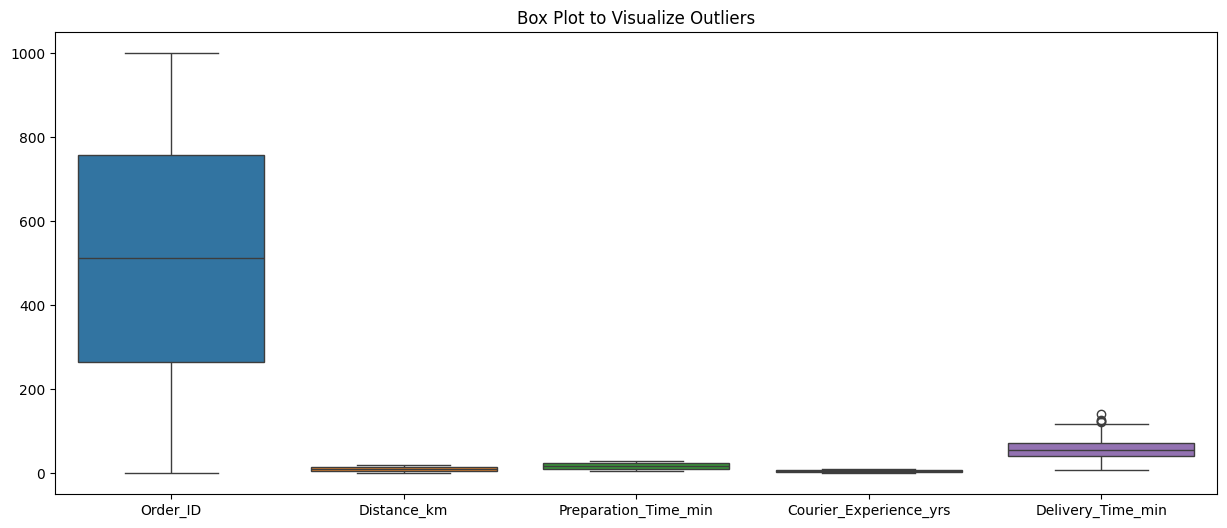

In [93]:
plt.figure(figsize=(15, 6))
plt.title("Box Plot to Visualize Outliers")
sns.boxplot(data=df1)
plt.show()

In [94]:
q1 = df1['Delivery_Time_min'].quantile(0.25)
q3 = df1['Delivery_Time_min'].quantile(0.75)

IQR = q3-q1
print(IQR)

30.0


In [95]:
outliers = ((df1['Delivery_Time_min'] < (q1 - 1.5 * IQR)) | (df1['Delivery_Time_min'] > (q3 + 1.5 * IQR)))


In [96]:
outliers

,Delivery_Time_min
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


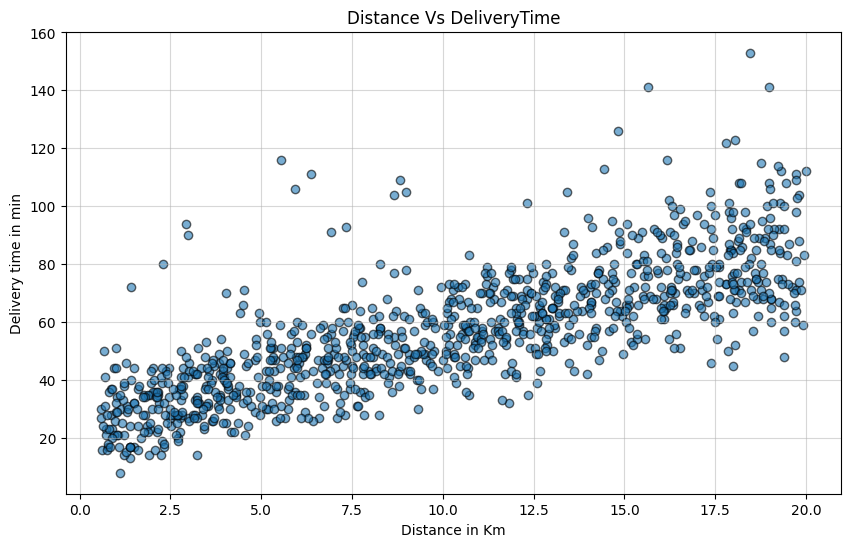

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(df['Distance_km'], df['Delivery_Time_min'], alpha=0.6, edgecolor='k')
plt.title("Distance Vs DeliveryTime")
plt.xlabel('Distance in Km')
plt.ylabel('Delivery time in min')
plt.grid(alpha=0.5)
plt.show()

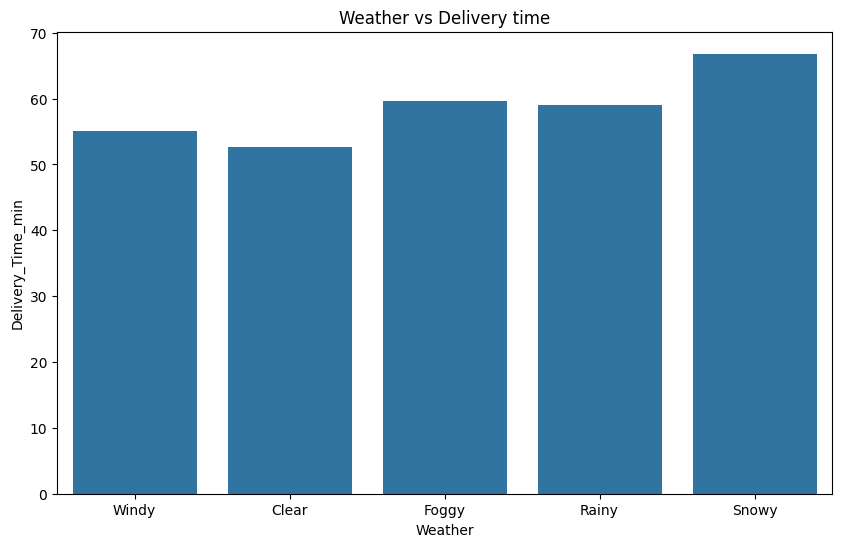

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(x='Weather', y='Delivery_Time_min', data=df1, errorbar=None)
plt.title("Weather vs Delivery time")
plt.show()

Text(0.5, 1.0, 'Time of the day vs Delivery time in min')

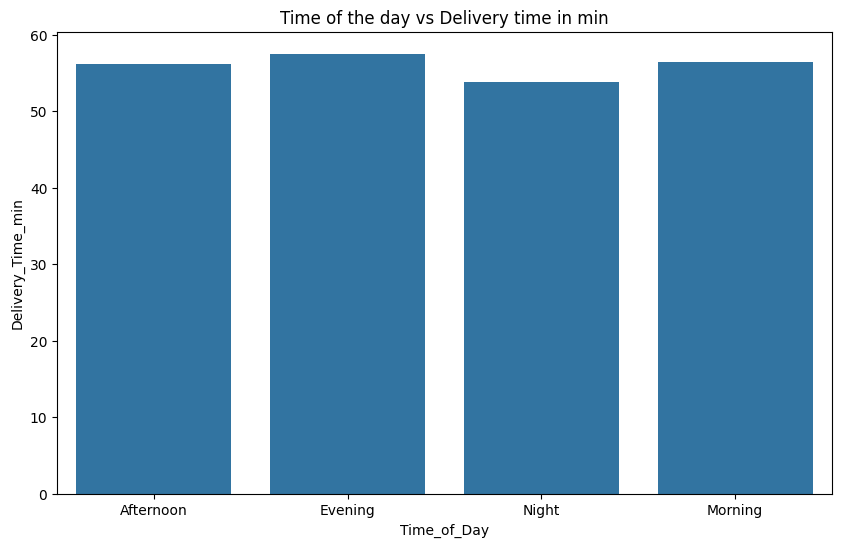

In [99]:
plt.figure(figsize=(10,6))
sns.barplot(x='Time_of_Day', y='Delivery_Time_min', data=df1, errorbar=None)
plt.title("Time of the day vs Delivery time in min")

In [100]:
#Convert categorical values to enncoding values

In [109]:
df1 = pd.get_dummies(df1, columns=['Weather','Traffic_Level','Time_of_Day','Vehicle_Type'])

In [110]:
df1.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False
2,741,9.52,28,1.0,59,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True
3,661,7.44,5,1.0,37,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True
4,412,19.03,16,5.0,68,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False


In [112]:
# Ensure values are 1/0 instead of True/False
df1 = df1.astype(int)


In [113]:
df1.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7,12,1,43,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,738,16,20,2,84,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,741,9,28,1,59,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,661,7,5,1,37,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4,412,19,16,5,68,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


# **Train test split**

In [114]:
y = df1['Delivery_Time_min']
y.head(5)

,Delivery_Time_min
0,43
1,84
2,59
3,37
4,68


In [116]:
x = df1.drop('Courier_Experience_yrs', axis=1)
x = df1.drop('Delivery_Time_min', axis=1)
x.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7,12,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,738,16,20,2,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,741,9,28,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,661,7,5,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4,412,19,16,5,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.75, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((662, 19), (221, 19), (662,), (221,))

In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [130]:
no_of_Epochs = 50

for epoch in range(1, no_of_Epochs + 1):

  model.fit(xtrain, ytrain)
  train_predictions = model.predict(xtrain)
  test_predictions = model.predict(xtest)

  # Calculate metrics
  train_mse = mean_squared_error(ytrain, train_predictions)
  test_mse = mean_squared_error(ytest, test_predictions)
  test_r2 = r2_score(ytest, test_predictions)

  # Print results for the current epoch
  print(f"Epoch {epoch}/{no_of_Epochs} - Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}, Test R2: {test_r2:.4f}")


# Final model evaluation
print("\nFinal Model Coefficients:", model.coef_)
print("Final Model Intercept:", model.intercept_)

Epoch 1/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 2/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 3/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 4/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 5/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 6/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 7/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 8/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 9/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 10/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 11/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 12/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 13/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 14/50 - Train MSE: 111.6468, Test MSE: 66.4612, Test R2: 0.8429
Epoch 15/50 - Train MSE: 111.